## Marketing and Retail Analytics

In the recent past, e-commerce companies have emerged and flourished in the industry. They offer the convenience to order from a wide variety of options from the comfort of one’s home. But how do they offer these “wide variety of options or products”? To be able to meet the demands of the customers, any e-commerce company would obviously need to store tons and tons of products in warehouses. Now, some of these warehoused products might be fast-moving products which sell very quickly and some others might be slow-moving. Each of the products being stored incurs a cost to the company in terms of space and maintenance. Since storing these products obviously add to the costs that the company incurs, it is absolutely necessary for the organisations to plan their inventory well.

 

Now, OList is one such e-commerce company that has faced some losses recently and they want to manage their inventory very well so as to reduce any unnecessary costs that they might be bearing. In this assignment, you have to manage the inventory cost of this e-commerce company OList. You need to identify top products that contribute to the revenue and also use market basket analysis to analyse the purchase behaviour of individual customers to estimate with relative certainty, what items are more likely to be purchased individually or in combination with some other products.

Project pipeline:


- Data exploration and cleaning: Identify missing and duplicate values in each column and treat them accordingly. Also, treat any and all data quality issues associated with the dataset.

- Data visualisation: Create appropriate visualisations to identify the most ordered products by quantity and revenue.
- Market basket analysis: Identify combinations of product categories that are ordered frequently and visualise them as required. This can be done by creating a simple matrix with product categories in the rows and columns and then checking which of the pairs show associations.
- Dashboarding and final PPT: Create a neat dashboard containing the important visualisations and supplement it with an executive summary containing valuable insights and recommended steps of action.

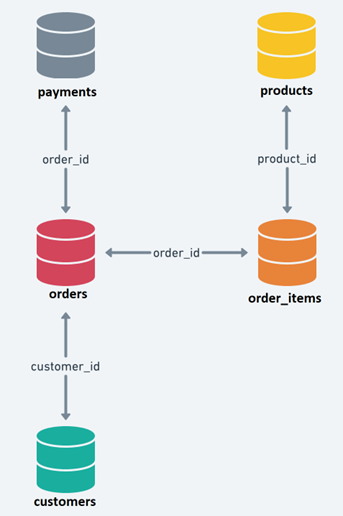

#### Import Liabraries:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#### Import files:

In [2]:
df_ord = pd.read_excel('Retail_dataset.xlsx', sheet_name='orders')
df_item = pd.read_excel('Retail_dataset.xlsx', sheet_name='order_items')
df_prod = pd.read_excel('Retail_dataset.xlsx', sheet_name='products')
df_paym = pd.read_excel('Retail_dataset.xlsx', sheet_name='payments')
df_cust = pd.read_excel('Retail_dataset.xlsx', sheet_name='customers')

In [3]:
# Total Rows in each dataframe

print("df_ord: ", df_ord.shape)
print("df_item:", df_item.shape)
print("df_prod:", df_prod.shape)
print("df_paym:", df_paym.shape)
print("df_cust:", df_cust.shape)

df_ord:  (99441, 7)
df_item: (112650, 6)
df_prod: (32951, 6)
df_paym: (103886, 5)
df_cust: (99441, 4)


In [4]:
# Filtering only order_status = 'delivered' >> This is project requirment
df_ord2= df_ord[df_ord['order_status'] == 'delivered']
df_ord2.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_timestamp,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,7c396fd4830fd04220f754e42b4e5bff,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,af07308b275d755c9edb36a90c618231,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-08-07 15:27:45,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,3a653a41f6f9fc3d2a113cf8398680e8,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-17 18:06:29,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,7c142cf63193a1473d2e66489a9ae977,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-12-02 00:28:42,2017-12-15
4,ad21c59c0840e6cb83a9ceb5573f8159,72632f0f9dd73dfee390c9b22eb56dd6,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-16 18:17:02,2018-02-26


In [5]:
print("df_ord2: ", df_ord2.shape)

df_ord2:  (96478, 7)


### Data Cleaning:

 Data Cleaning Parts:
1. Missing values 
2. Duplicates 
3. Inconsistent data types 
4. Outliers

#### 1. Missing values:

Opening one by one all file to see overvall null value present

In [6]:
# File >> df_ord2
df_ord2.isna().sum()

order_id                          0
customer_id                       0
order_status                      0
order_purchase_timestamp          0
order_approved_at                14
order_delivered_timestamp         8
order_estimated_delivery_date     0
dtype: int64

In [7]:
# File >> df_item
df_item.isna().sum()

order_id            0
order_item_id       0
product_id          0
seller_id           0
price               0
shipping_charges    0
dtype: int64

In [8]:
# File >> df_prod
df_prod.isna().sum()

product_id                 0
product_category_name    170
product_weight_g           2
product_length_cm          2
product_height_cm          2
product_width_cm           2
dtype: int64

In [9]:
# File >> df_paym
df_paym.isna().sum()

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

In [10]:
# File >> df_cust
df_cust.isna().sum()

customer_id                 0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

In [11]:
# In above file only two files having null values: 'df_ord2' & 'df_prod'. So, Need to clean one by one

In [12]:
# Taking First >> 'df_ord2'

# Null values in %
df_ord2.isna().sum()/len(df_ord2)*100

order_id                         0.000000
customer_id                      0.000000
order_status                     0.000000
order_purchase_timestamp         0.000000
order_approved_at                0.014511
order_delivered_timestamp        0.008292
order_estimated_delivery_date    0.000000
dtype: float64

In [13]:
# 'df_ord2' having very less null null values <5%, so deciding to drop those rows.

df_ord2.dropna(axis=0, inplace=True)

In [14]:
# Checking Null values
df_ord2.isna().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_timestamp        0
order_estimated_delivery_date    0
dtype: int64

In [15]:
# Taking >> 'df_prod'

# Null values in %
df_prod.isna().sum()/len(df_prod)*100

product_id               0.000000
product_category_name    0.515918
product_weight_g         0.006070
product_length_cm        0.006070
product_height_cm        0.006070
product_width_cm         0.006070
dtype: float64

In [16]:
# 'df_prod' having very less null values <5%, so deciding to drop those rows.

In [17]:
# Dropping null & inplace
df_prod.dropna(axis=0, inplace=True)

In [18]:
# Checking whether cleaned or not
df_prod.isna().sum()

product_id               0
product_category_name    0
product_weight_g         0
product_length_cm        0
product_height_cm        0
product_width_cm         0
dtype: int64

So, all dataframe having no null values

#### 2.Dropping Duplicates

In [19]:
# Total Rows in each dataframe

print("df_ord2:", sum(df_ord2.duplicated())==0)
print("df_item:", sum(df_item.duplicated())==0)
print("df_prod:", sum(df_prod.duplicated())==0)
print("df_paym:", sum(df_paym.duplicated())==0)
print("df_cust:", sum(df_cust.duplicated())==0)

df_ord2: True
df_item: True
df_prod: True
df_paym: True
df_cust: False


In [20]:
# Only df_cust having duplicate rows, So droping Duplicate 'df_cust'
df_cust.drop_duplicates(inplace=True)
df_cust.shape

(96352, 4)

In [21]:
# Duplicate rows in 'df_cust'
print('Diplicate rows:',99441-96352)
print('Diplicate Percentage:',round(100-(96352/99441*100),2))

Diplicate rows: 3089
Diplicate Percentage: 3.11


So, Only df_cust dataframe had the duplicate rows and these are removed.

#### 3. Inconsistent data types:

Here, We going to check Data Type to understand the inconsistencies

In [22]:
# Checking inconsistencies
df_ord2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96456 entries, 0 to 99440
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       96456 non-null  object        
 1   customer_id                    96456 non-null  object        
 2   order_status                   96456 non-null  object        
 3   order_purchase_timestamp       96456 non-null  datetime64[ns]
 4   order_approved_at              96456 non-null  datetime64[ns]
 5   order_delivered_timestamp      96456 non-null  datetime64[ns]
 6   order_estimated_delivery_date  96456 non-null  datetime64[ns]
dtypes: datetime64[ns](4), object(3)
memory usage: 5.9+ MB


In [23]:
df_ord2.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_timestamp,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,7c396fd4830fd04220f754e42b4e5bff,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,af07308b275d755c9edb36a90c618231,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-08-07 15:27:45,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,3a653a41f6f9fc3d2a113cf8398680e8,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-17 18:06:29,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,7c142cf63193a1473d2e66489a9ae977,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-12-02 00:28:42,2017-12-15
4,ad21c59c0840e6cb83a9ceb5573f8159,72632f0f9dd73dfee390c9b22eb56dd6,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-16 18:17:02,2018-02-26


In [24]:
# df_ord2: All column having consistant data type

In [25]:
# Checking inconsistencies
df_item.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   order_id          112650 non-null  object 
 1   order_item_id     112650 non-null  int64  
 2   product_id        112650 non-null  object 
 3   seller_id         112650 non-null  object 
 4   price             112650 non-null  float64
 5   shipping_charges  112650 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 5.2+ MB


In [26]:
df_item.head()

,order_id,order_item_id,product_id,seller_id,price,shipping_charges
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,199.90,18.14


In [27]:
# Checking inconsistencies
df_prod.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32779 entries, 0 to 32950
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   product_id             32779 non-null  object 
 1   product_category_name  32779 non-null  object 
 2   product_weight_g       32779 non-null  float64
 3   product_length_cm      32779 non-null  float64
 4   product_height_cm      32779 non-null  float64
 5   product_width_cm       32779 non-null  float64
dtypes: float64(4), object(2)
memory usage: 1.8+ MB


In [28]:
df_prod.head()

,product_id,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumery,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,art,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,sports_leisure,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,baby,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,housewares,625.0,20.0,17.0,13.0


In [29]:
# Checking inconsistencies
df_paym.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [30]:
# Checking inconsistencies
df_cust.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96352 entries, 0 to 99440
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               96352 non-null  object
 1   customer_zip_code_prefix  96352 non-null  int64 
 2   customer_city             96352 non-null  object
 3   customer_state            96352 non-null  object
dtypes: int64(1), object(3)
memory usage: 3.7+ MB


No any inconsistencies found, catogarical values also checked in excel using filter tab

#### 4.Outlier:

##### >> df_ord2:

In [31]:
# order_status Value count to check 
df_ord2['order_status'].value_counts()

order_status
delivered    96456
Name: count, dtype: int64

- No Outlier present in df_ord2

In [32]:
# Date Min-Max range
print(df_ord2['order_purchase_timestamp'].min(), df_ord['order_purchase_timestamp'].max())

2016-09-15 12:16:38 2018-10-17 17:30:18


##### >> df_item:

In [33]:
# Checking df_item outlier
df_item.head()

,order_id,order_item_id,product_id,seller_id,price,shipping_charges
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,199.90,18.14


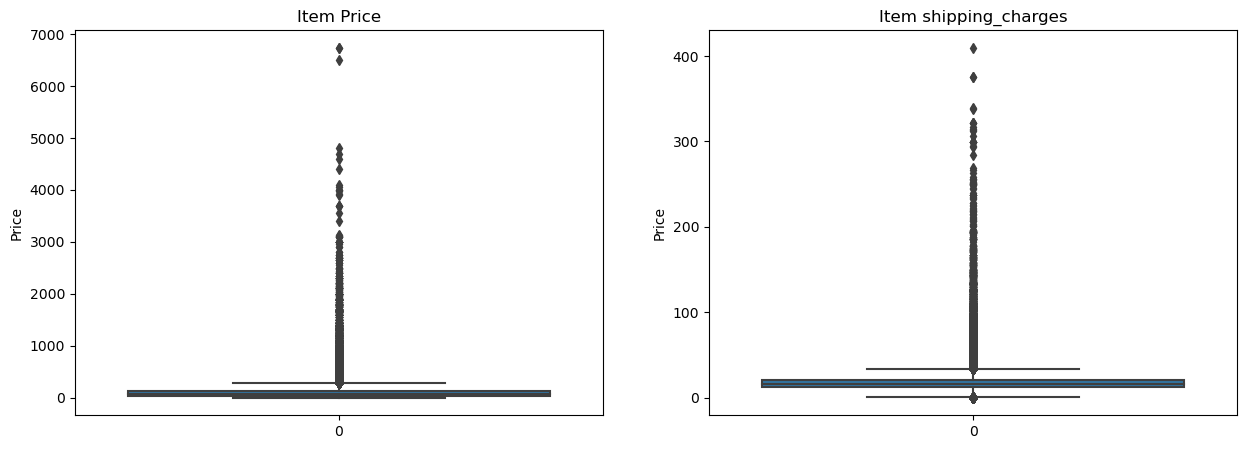

In [34]:
# Item price & shipping_charges > outlier
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
sns.boxplot(df_item['price'])
plt.ylabel('Price')
plt.title('Item Price')

plt.subplot(1,2,2)
sns.boxplot(df_item['shipping_charges'])
plt.ylabel('Price')
plt.title('Item shipping_charges')
plt.show()

 - We keeping outlier, because it is valuable insights. 

##### >> df_item

In [35]:
# Dataframe
df_prod.head(3)

,product_id,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumery,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,art,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,sports_leisure,154.0,18.0,9.0,15.0


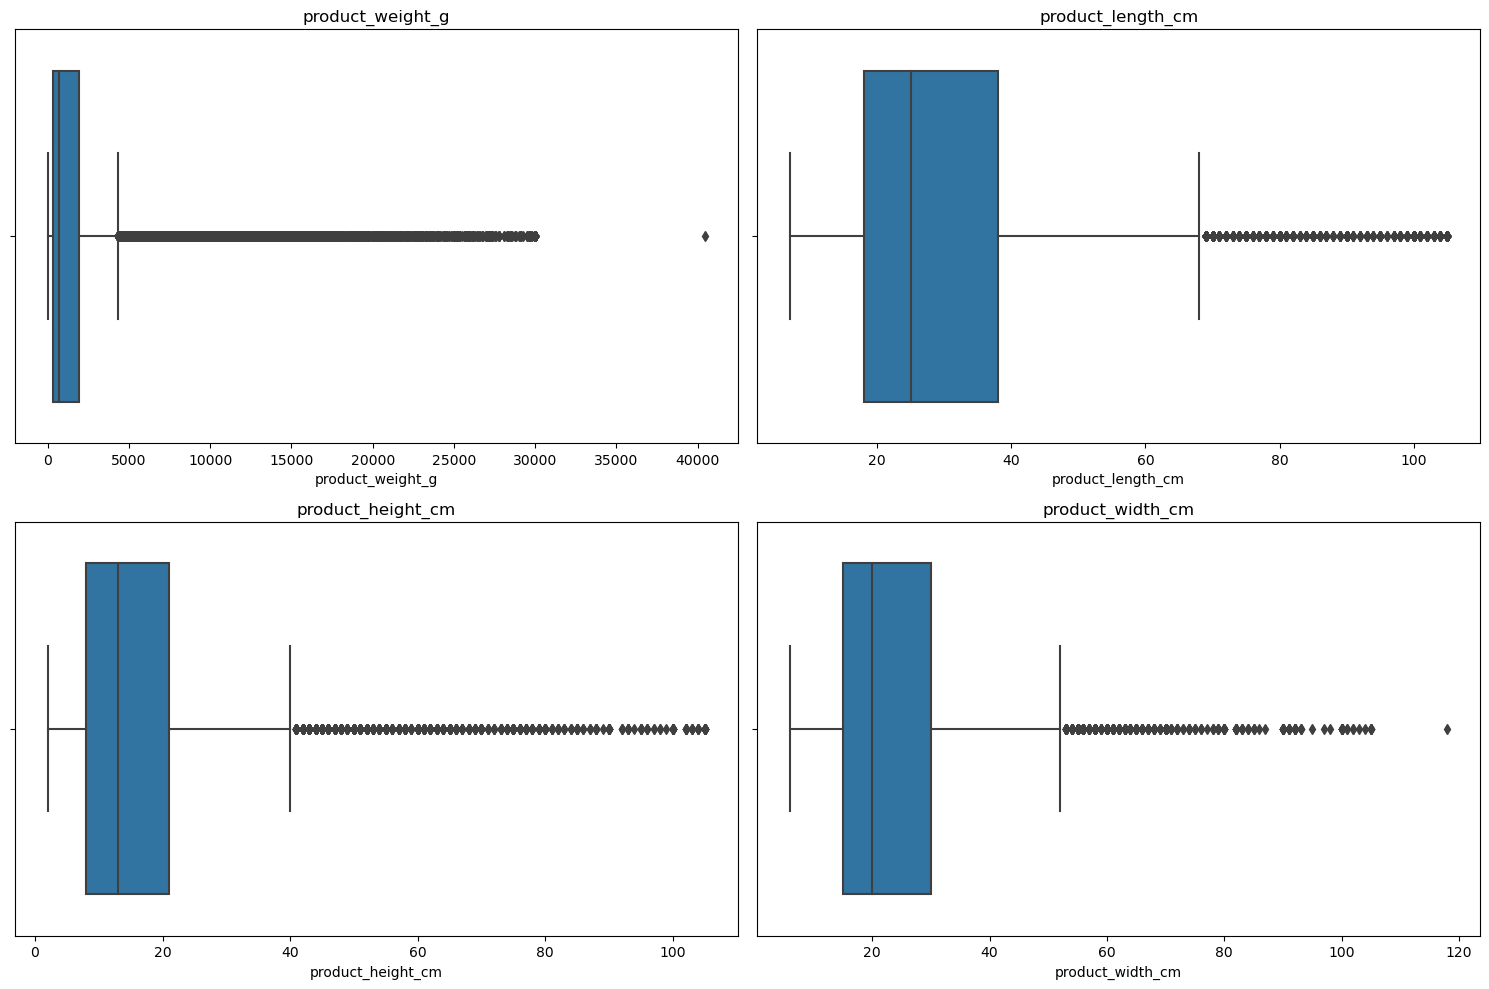

In [36]:
# 2x2 figure layout to know outlier
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# First boxplot
sns.boxplot(x=df_prod['product_weight_g'], ax=axes[0, 0])
axes[0, 0].set_title('product_weight_g')

# Second boxplot
sns.boxplot(x=df_prod['product_length_cm'], ax=axes[0, 1])
axes[0, 1].set_title('product_length_cm')

# Third boxplot
sns.boxplot(x=df_prod['product_height_cm'], ax=axes[1, 0])
axes[1, 0].set_title('product_height_cm')

# Fourth boxplot
sns.boxplot(x=df_prod['product_width_cm'], ax=axes[1, 1])
axes[1, 1].set_title('product_width_cm')

# Adjust layout for better visualization
plt.tight_layout()
plt.show()



##### >> df_paym

In [37]:
df_paym.head(3)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71


In [38]:
# payment_installments
df_paym['payment_sequential'].value_counts()

payment_sequential
1     99360
2      3039
3       581
4       278
5       170
6       118
7        82
8        54
9        43
10       34
11       29
12       21
13       13
14       10
15        8
18        6
19        6
16        6
17        6
21        4
20        4
22        3
26        2
24        2
23        2
25        2
29        1
28        1
27        1
Name: count, dtype: int64

In [39]:
df_paym['payment_type'].value_counts()

payment_type
credit_card    76795
wallet         19784
voucher         5775
debit_card      1529
not_defined        3
Name: count, dtype: int64

In [40]:
df_paym[df_paym['payment_type']== 'not_defined']

,order_id,payment_sequential,payment_type,payment_installments,payment_value
51280,4637ca194b6387e2d538dc89b124b0ee,1,not_defined,1,0.0
57411,00b1cb0320190ca0daa2c88b35206009,1,not_defined,1,0.0
94427,c8c528189310eaa44a745b8d9d26908b,1,not_defined,1,0.0


- not_defined payment value is 0

In [41]:
#Lets check 'payment_value']== 0.0 , to find any connection with ['payment_type'] == 'not_defined'
df_paym[df_paym['payment_value']== 0.0]

,order_id,payment_sequential,payment_type,payment_installments,payment_value
19922,8bcbe01d44d147f901cd3192671144db,4,voucher,1,0.0
36822,fa65dad1b0e818e3ccc5cb0e39231352,14,voucher,1,0.0
43744,6ccb433e00daae1283ccc956189c82ae,4,voucher,1,0.0
51280,4637ca194b6387e2d538dc89b124b0ee,1,not_defined,1,0.0
57411,00b1cb0320190ca0daa2c88b35206009,1,not_defined,1,0.0
62674,45ed6e85398a87c253db47c2d9f48216,3,voucher,1,0.0
77885,fa65dad1b0e818e3ccc5cb0e39231352,13,voucher,1,0.0
94427,c8c528189310eaa44a745b8d9d26908b,1,not_defined,1,0.0
100766,b23878b3e8eb4d25a158f57d96331b18,4,voucher,1,0.0


-  Here all payment_type is voucher having payment_value 0, so we replacing not_defined using voucher

In [42]:
# Replacing 'not_defined' to  'voucher'
df_paym['payment_type']= df_paym['payment_type'].replace('not_defined', 'voucher')

In [43]:
# Checking replacement
df_paym['payment_type'].value_counts()

payment_type
credit_card    76795
wallet         19784
voucher         5778
debit_card      1529
Name: count, dtype: int64

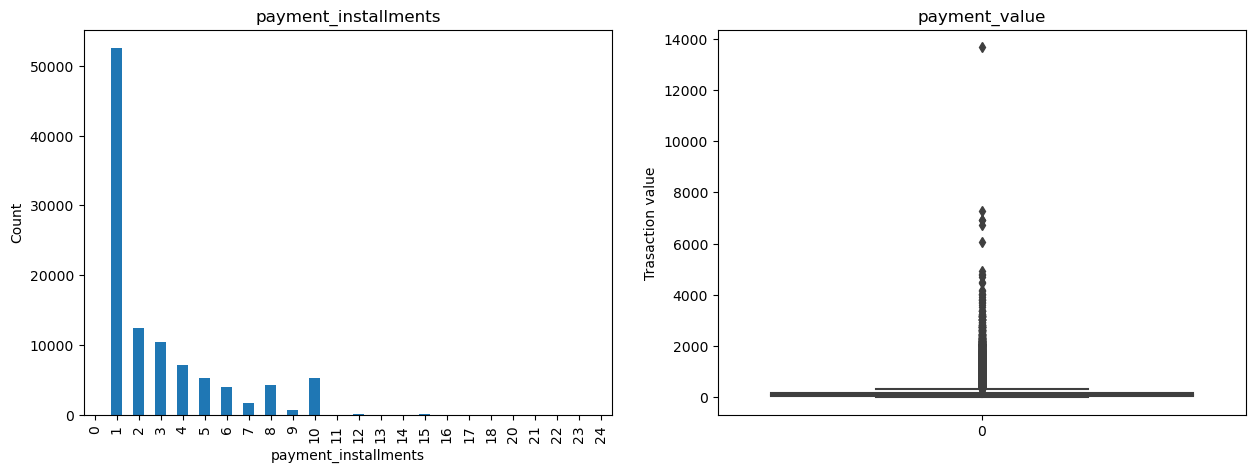

In [44]:

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
df_paym['payment_installments'].value_counts().sort_index().plot.bar()
plt.ylabel('Count')
plt.title('payment_installments')

plt.subplot(1,2,2)
sns.boxplot(df_paym['payment_value'])
plt.ylabel('Trasaction value')
plt.title('payment_value')
plt.show()

- In payment_value having outlier but we not going to remove it, because it has important insight in it.

### EDA

- We did some EDA while cleaning the datasets, now apart from that we need to explore the data more, so we can understand data more deeply.

We have dataframes:
- orders : df_ord2 
- order_items: df_item
- products: df_prod
- payments: df_paym
- customers: df_cust

##### >> df_ord2

In [45]:
# Dataframe
df_ord2.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_timestamp,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,7c396fd4830fd04220f754e42b4e5bff,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,af07308b275d755c9edb36a90c618231,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-08-07 15:27:45,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,3a653a41f6f9fc3d2a113cf8398680e8,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-17 18:06:29,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,7c142cf63193a1473d2e66489a9ae977,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-12-02 00:28:42,2017-12-15
4,ad21c59c0840e6cb83a9ceb5573f8159,72632f0f9dd73dfee390c9b22eb56dd6,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-16 18:17:02,2018-02-26


In [56]:
# Creating new column 'Actual_Delivery_Time' 
df_ord2['Actual_Delivery_Time']= (df_ord2['order_delivered_timestamp']- df_ord2['order_purchase_timestamp']).dt.days

In [57]:
df_ord2.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_timestamp,order_estimated_delivery_date,Actual_Delivery_Time
0,e481f51cbdc54678b7cc49136f2d6af7,7c396fd4830fd04220f754e42b4e5bff,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-10 21:25:13,2017-10-18,8
1,53cdb2fc8bc7dce0b6741e2150273451,af07308b275d755c9edb36a90c618231,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-08-07 15:27:45,2018-08-13,13
2,47770eb9100c2d0c44946d9cf07ec65d,3a653a41f6f9fc3d2a113cf8398680e8,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-17 18:06:29,2018-09-04,9
3,949d5b44dbf5de918fe9c16f97b45f8a,7c142cf63193a1473d2e66489a9ae977,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-12-02 00:28:42,2017-12-15,13
4,ad21c59c0840e6cb83a9ceb5573f8159,72632f0f9dd73dfee390c9b22eb56dd6,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-16 18:17:02,2018-02-26,2


In [82]:
# Count of Actual_Delivery_Time greater than 30 days
df_ord2[df_ord2['Actual_Delivery_Time']>30]['order_id'].unique().shape

(4117,)

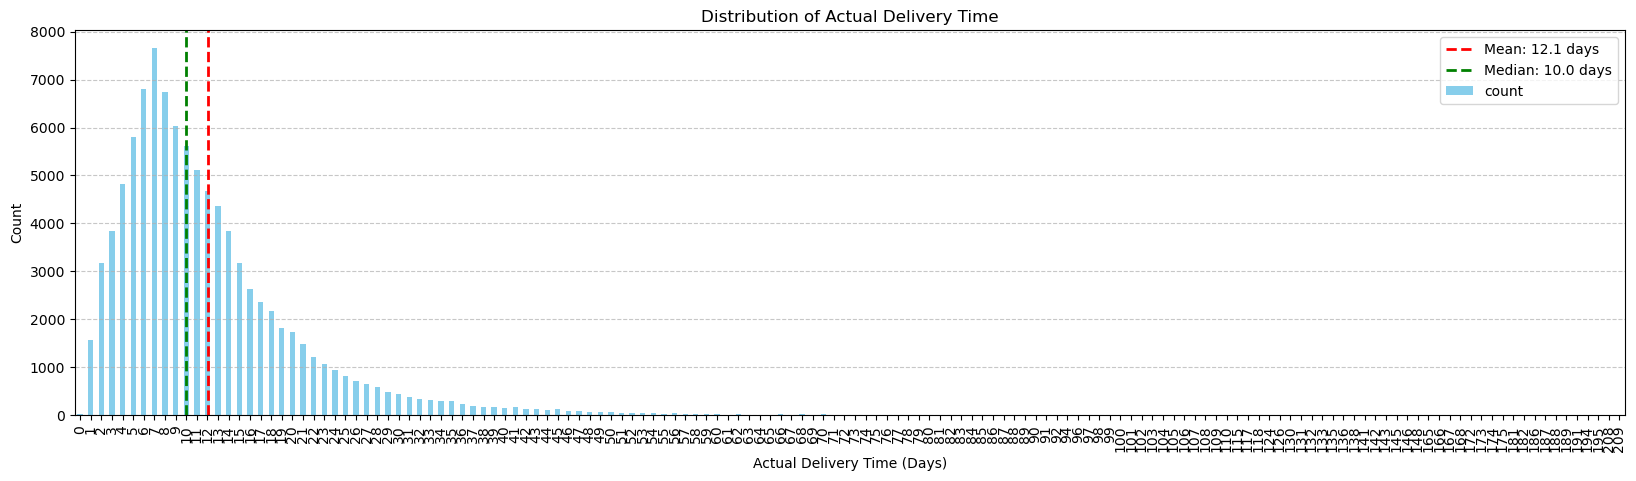

In [81]:
# Actual Delivery Time >> Compute mean and median
mean_time = df_ord2['Actual_Delivery_Time'].mean()
median_time = df_ord2['Actual_Delivery_Time'].median()

# Plot bar chart
plt.figure(figsize=(20, 5))
df_ord2['Actual_Delivery_Time'].value_counts().sort_index().plot.bar(color='skyblue')

# Add vertical lines for mean & median
plt.axvline(mean_time, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean_time:.1f} days')
plt.axvline(median_time, color='green', linestyle='dashed', linewidth=2, label=f'Median: {median_time:.1f} days')

# Labels and Title
plt.xlabel("Actual Delivery Time (Days)")
plt.ylabel("Count")
plt.title("Distribution of Actual Delivery Time")
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

- Mean Delivery Time (Days) = 12.1
- Median Delivery Time (Days) = 10.0

##### >> df_item

In [83]:
df_item.head()

,order_id,order_item_id,product_id,seller_id,price,shipping_charges
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,199.90,18.14


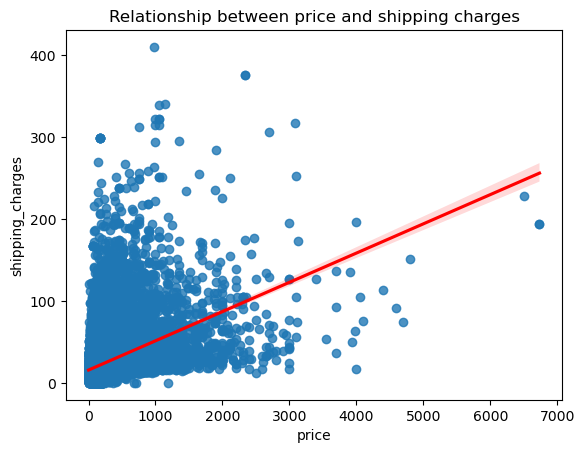

In [89]:
# Checking relationship between price and shipping charges
sns.regplot(data=df_item, x='price', y='shipping_charges', scatter=True, line_kws={"color": "red"})
plt.title('Relationship between price and shipping charges')
plt.show()

#### >> df_prod

In [90]:
df_prod.head()

,product_id,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumery,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,art,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,sports_leisure,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,baby,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,housewares,625.0,20.0,17.0,13.0


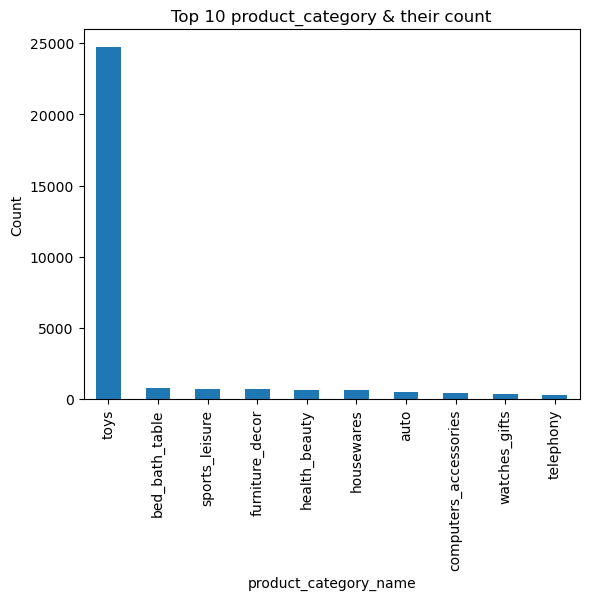

In [105]:
# Top 10 product_category & their count 
df_prod['product_category_name'].value_counts().head(10).plot.bar()
plt.ylabel('Count')
plt.title('Top 10 product_category & their count')
plt.show()

- Toys category has highest number of product available at OList

In [106]:
df_prod.shape

(32779, 6)

##### >> df_cust

In [107]:
df_cust.head()

,customer_id,customer_zip_code_prefix,customer_city,customer_state
0,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [116]:
# No. of  City
df_cust['customer_city'].unique().shape[0]

4119

In [118]:
# No. of  Zip
df_cust['customer_zip_code_prefix'].unique().shape[0]

14994

<Axes: xlabel='customer_state'>

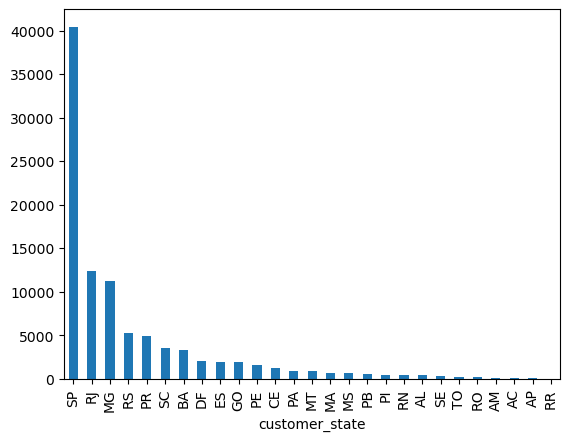

In [120]:
df_cust['customer_state'].value_counts().plot.bar()

### Merging Data